<a href="https://colab.research.google.com/github/BernasconiLorenzo06/Prep_veri_Gopandas/blob/main/GEOPANDAS_sommativa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [30]:
!pip install geopandas
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
!pip install contextily
import contextily

In [ ]:
provincie = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ProvCM01012022_g")
provincie
provincie3857 = provincie.to_crs(epsg=3857)
provincie3857

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Com01012022_g")
comuni
comuni3857 = comuni.to_crs(epsg=3857)
comuni3857

1. dato il nome di una provincia inserito dall'utente, visualizzarne i confini su una mappa di contextily


inserire un provincia  Milano


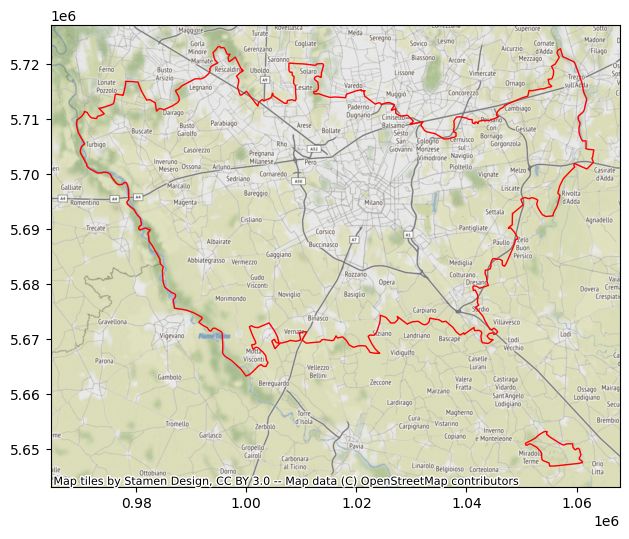

In [48]:
provinciaInput = input("inserire un provincia  ");
prov = provincie3857[provincie3857["DEN_UTS"]== provinciaInput]
ax = prov.plot(edgecolor =  "red", facecolor = "None",figsize=(12,6),markersize = 5)
contextily.add_basemap(ax)

2. creare un nuovo geodataset contenente i comuni di quella provincia


In [ ]:
provinciaInput = input("inserire un provincia  ");
prov = provincie3857[provincie3857["DEN_UTS"]== provinciaInput]
comuni_provinciaselezionata = comuni3857[comuni3857.within(prov.geometry.item())]
comuni_provinciaselezionata.plot()

3. visualizzare l'elenco dei comuni presenti in quella provincia. L'elenco deve essere in ordine alfabetico

In [ ]:
comuni_provinciaselezionata.sort_values(by = "COMUNE")[["COMUNE","Shape_Area"]]

3. costruire un dizionario contenente i nomi dei comuni della provincia inserita e la loro estensione

In [ ]:
dizionario = dict(zip(comuni_provinciaselezionata["COMUNE"], comuni_provinciaselezionata["Shape_Area"]))
dizionario

4. progettare una funzione che trasformi una superficie da kmq in miglia quadrate


In [ ]:
def conversione(kmq):
  miglia = kmq * 0.386102
  return miglia
var = float(input("inserisci un numero"))
conversione(var)


5. applicare la funzione appena creata al geodataset dei comuni della provincia, aggiungendo una colonna denominata superficeInMigliaQuadrate


In [ ]:
comuni_provinciaselezionata["superficeInMigliaQuadrate"] = conversione(comuni_provinciaselezionata["Shape_Area"])
comuni_provinciaselezionata

6. creare una altro geodataset contenente i comuni che confinano con la provincia inserita dall'utente



In [ ]:
provinciaInput = input("inserire un provincia  ");
prov = provincie3857[provincie3857["DEN_UTS"]== provinciaInput]
comuni_provinciaselezionata_confinanti = comuni3857[comuni3857.touches(prov.geometry.item())]
comuni_provinciaselezionata_confinanti.plot()

7. calcolare l'estensione complessiva  in miglia quadrate dei comuni che confinano con la provincia inserita dall'utente


In [57]:
conversione(comuni_provinciaselezionata_confinanti['Shape_Area'].sum())

400111048.0007805

8. visualizzare il comune confinante più esteso


In [64]:
comune_max_steso = comuni_provinciaselezionata_confinanti[(comuni_provinciaselezionata_confinanti['Shape_Area']) == (comuni_provinciaselezionata_confinanti['Shape_Area'].max())]
comune_max_steso

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
2593,1,3,18,0,18,18177,018177,Vigevano,NaN,0,50333.883316,8.163630e+07,"POLYGON ((987006.658 5677536.690, 986894.593 5..."


9. calcolare la distanza tra il capoluogo della provincia inserita dall'utente e Milano
